# Text-based Decision Tree on Reddit Threads Data

Rui Qiu (rq47)
2021-11-02

Cleaning script can be found at [reddit-scraper-v2.R](reddit-scraper-v2.R).

In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

reddit = pd.read_csv("../data/nba-reddit/nba-top-100-threads-this-year-cleaned.csv")
reddit

,title,upvote_ratio
0,Draymond Green on last night's Capitol breach:...,top rated
1,"[Jaylen Brown] “In one America, you get killed...",top rated
2,[Scipioni] NBA legend Charles Barkley: ‘The on...,somewhat top rated
3,Giannis orders 50 chicken nuggets on IG live a...,somewhat top rated
4,"Doc Rivers: “I will say it, because I don’t th...",top rated
...,...,...
95,[Highlight] Fan ejected for pouring popcorn at...,very top rated
96,"[Highlight] Kenny Smith: ""Hakeem Olajuwon used...",highly top rated
97,[Highlight] Paul George tries to pass it to th...,somewhat top rated
98,Enes Kanter doubles down on China and calls Xi...,very top rated


In [222]:
import re

replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "numbr"),              # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/\_\(\)\:\[\]\"\'\‘\`\“\”\?\’\$]", " "),   # Punctuation and other junk
    (r"\s+", " "),                   # Strips extra whitespace
    (r"^\s+", "")
]

for repl in replace:
    reddit['title'] = [re.sub(repl[0], repl[1], text) for text in reddit['title']]

reddit['title'] = reddit['title'].str.lower()

In [223]:
reddit

,title,upvote_ratio
0,draymond green on last night s capitol breach ...,top rated
1,jaylen brown in one america you get killed by ...,top rated
2,scipioni nba legend charles barkley the only p...,somewhat top rated
3,giannis orders numbr chicken nuggets on ig liv...,somewhat top rated
4,doc rivers i will say it because i don t think...,top rated
...,...,...
95,highlight fan ejected for pouring popcorn at w...,very top rated
96,highlight kenny smith hakeem olajuwon used to ...,highly top rated
97,highlight paul george tries to pass it to the ...,somewhat top rated
98,enes kanter doubles down on china and calls xi...,very top rated


In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(['t', 'p', 's', 'f', 'w'])

vec_tfidf = TfidfVectorizer(input='title', stop_words=my_stop_words, ngram_range=(2, 3), max_features=1000)
dtm = vec_tfidf.fit_transform(reddit['title'])
col_names = vec_tfidf.get_feature_names()
df = pd.DataFrame(dtm.toarray(), columns=col_names)
df['upvote'] = reddit['upvote_ratio']
df

,accounts liked,agreed trade,agreed trade russell,angeles lakers,anthony davis,anthony towns,championship contention,charles barkley,come nba,dallas mavericks,...,уou think,уou think overall,уou think yourѕelf,уou ѕelfleѕѕ,уou ѕelfleѕѕ took,ѕelfleѕѕ took,ѕelfleѕѕ took vaссine,ѕometimes уou,ѕometimes уou ѕelfleѕѕ,upvote
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,top rated
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,top rated
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291154,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,somewhat top rated
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,somewhat top rated
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,top rated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,very top rated
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.229451,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,highly top rated
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,somewhat top rated
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,very top rated


In [225]:
pd.DataFrame.to_csv(df, '../data/nba-reddit/nba-top-100-threads-this-year-tfidf.csv')

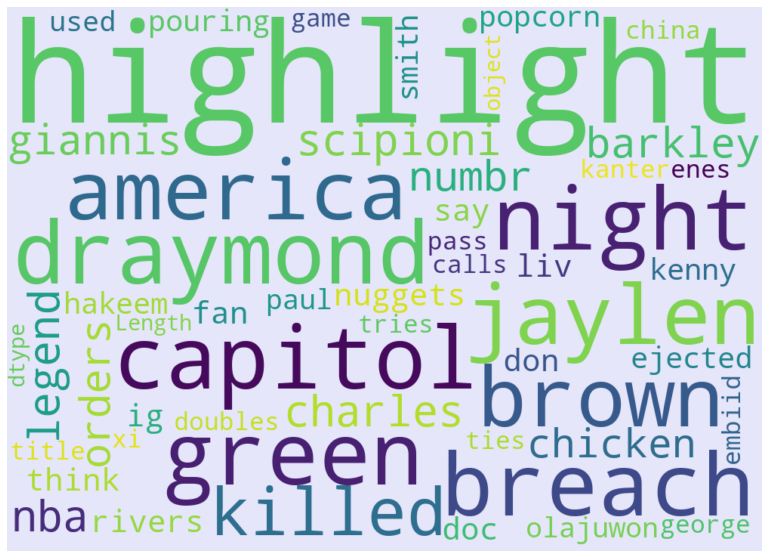

In [226]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(15, 10))
wordcloud = WordCloud(background_color='lavender',
                        width=1000, height=720,
                        random_state=42, stopwords=my_stop_words,
                        font_step=2,
                        max_words=100,
                        max_font_size=500).generate(str(reddit['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('reddit-title-wordcloud.png')

In [227]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'upvote'], df['upvote'], test_size=0.2, random_state=42, stratify=df['upvote'])

## `sklearn.tree.export_text`

In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf1 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=2, criterion='gini', splitter='random')
tree1 = clf1.fit(X_train, y_train)

In [229]:
# text representation of the model
text_representation = tree.export_text(tree1)
print(text_representation)

|--- feature_7 <= 0.19
|   |--- feature_601 <= 0.02
|   |   |--- feature_36 <= 0.11
|   |   |   |--- feature_62 <= 0.08
|   |   |   |   |--- feature_23 <= 0.51
|   |   |   |   |   |--- feature_10 <= 0.20
|   |   |   |   |   |   |--- feature_4 <= 0.10
|   |   |   |   |   |   |   |--- feature_482 <= 0.14
|   |   |   |   |   |   |   |   |--- feature_14 <= 0.41
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.14
|   |   |   |   |   |   |   |   |   |   |--- class: very top rated
|   |   |   |   |   |   |   |   |   |--- feature_11 >  0.14
|   |   |   |   |   |   |   |   |   |   |--- class: very top rated
|   |   |   |   |   |   |   |   |--- feature_14 >  0.41
|   |   |   |   |   |   |   |   |   |--- class: very top rated
|   |   |   |   |   |   |   |--- feature_482 >  0.14
|   |   |   |   |   |   |   |   |--- class: very top rated
|   |   |   |   |   |   |--- feature_4 >  0.10
|   |   |   |   |   |   |   |--- class: highly top rated
|   |   |   |   |   |--- feature_10 >  0.20
|   |  

## `plot_tree` (with Gini index)

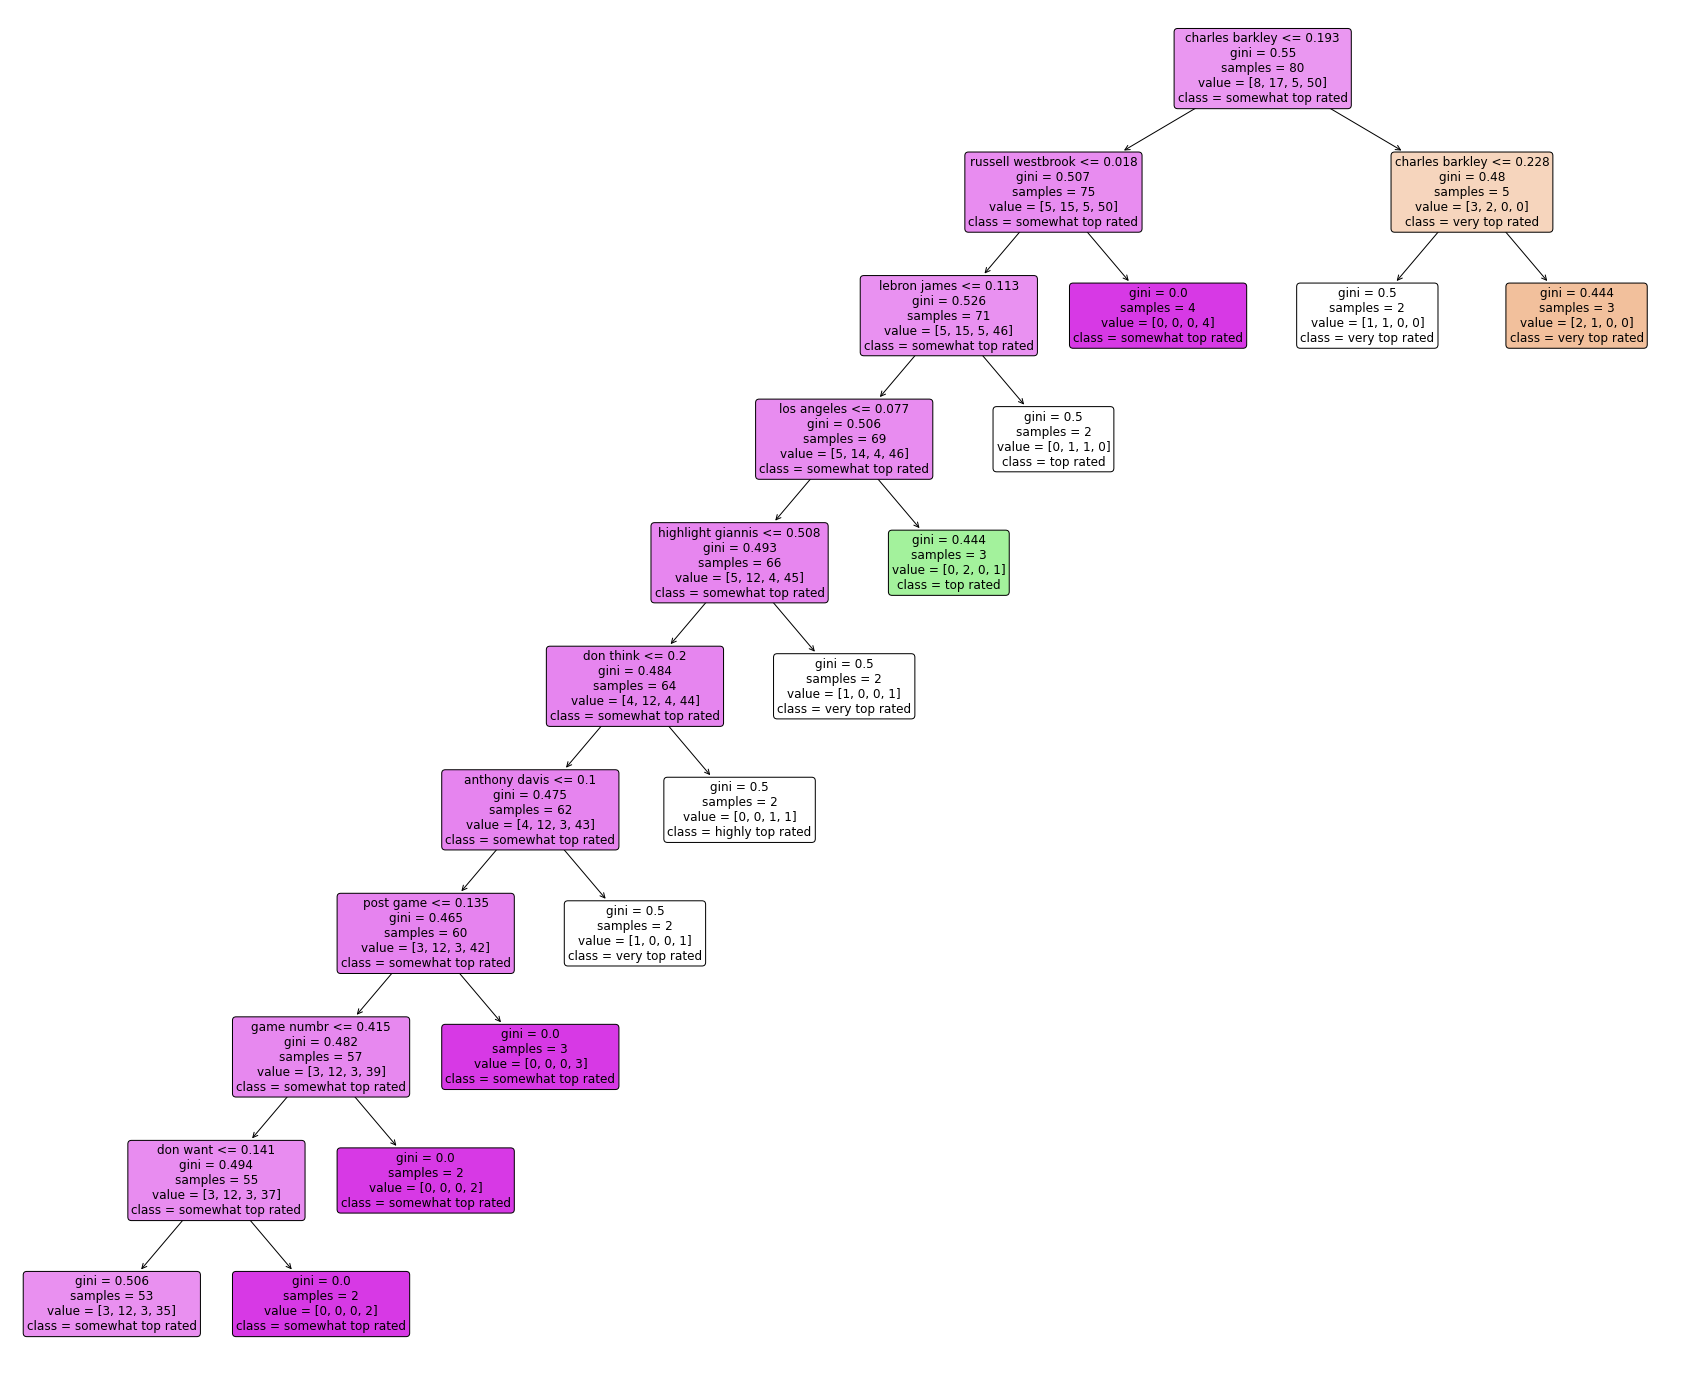

In [230]:
fig = plt.figure(figsize=(30, 25))
_ = tree.plot_tree(clf1, impurity=True, rounded=True,
    feature_names = X_train.columns, class_names = y_train.unique(), filled=True, fontsize=12)

In [231]:
fig.savefig('tree1.png')

In [232]:
y_test_predict_proba = clf1.predict_proba(X_test)
y_test_predict = clf1.predict(X_test)
y_test_predict

array(['very top rated', 'very top rated', 'very top rated',
       'very top rated', 'very top rated', 'very top rated',
       'very top rated', 'very top rated', 'very top rated',
       'very top rated', 'very top rated', 'very top rated',
       'very top rated', 'highly top rated', 'very top rated',
       'very top rated', 'very top rated', 'very top rated',
       'very top rated', 'very top rated'], dtype=object)

In [233]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(y_test, y_test_predict, labels=['highly top rated', 'very top rated', 'somewhat top rated', 'top rated'])

array([[ 0,  2,  0,  0],
       [ 0, 13,  0,  0],
       [ 0,  4,  0,  0],
       [ 1,  0,  0,  0]])

<Figure size 1080x720 with 0 Axes>

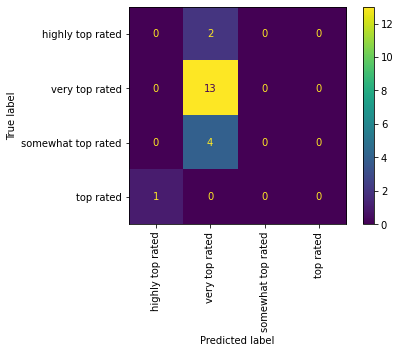

In [234]:
plt.figure(figsize=(15, 10))
plot_confusion_matrix(clf1, X_test, y_test, labels=['highly top rated', 'very top rated', 'somewhat top rated', 'top rated'])
plt.xticks(rotation ='vertical')
fig.savefig('tree1_cm.png')

## `plot_tree` (with entropy)

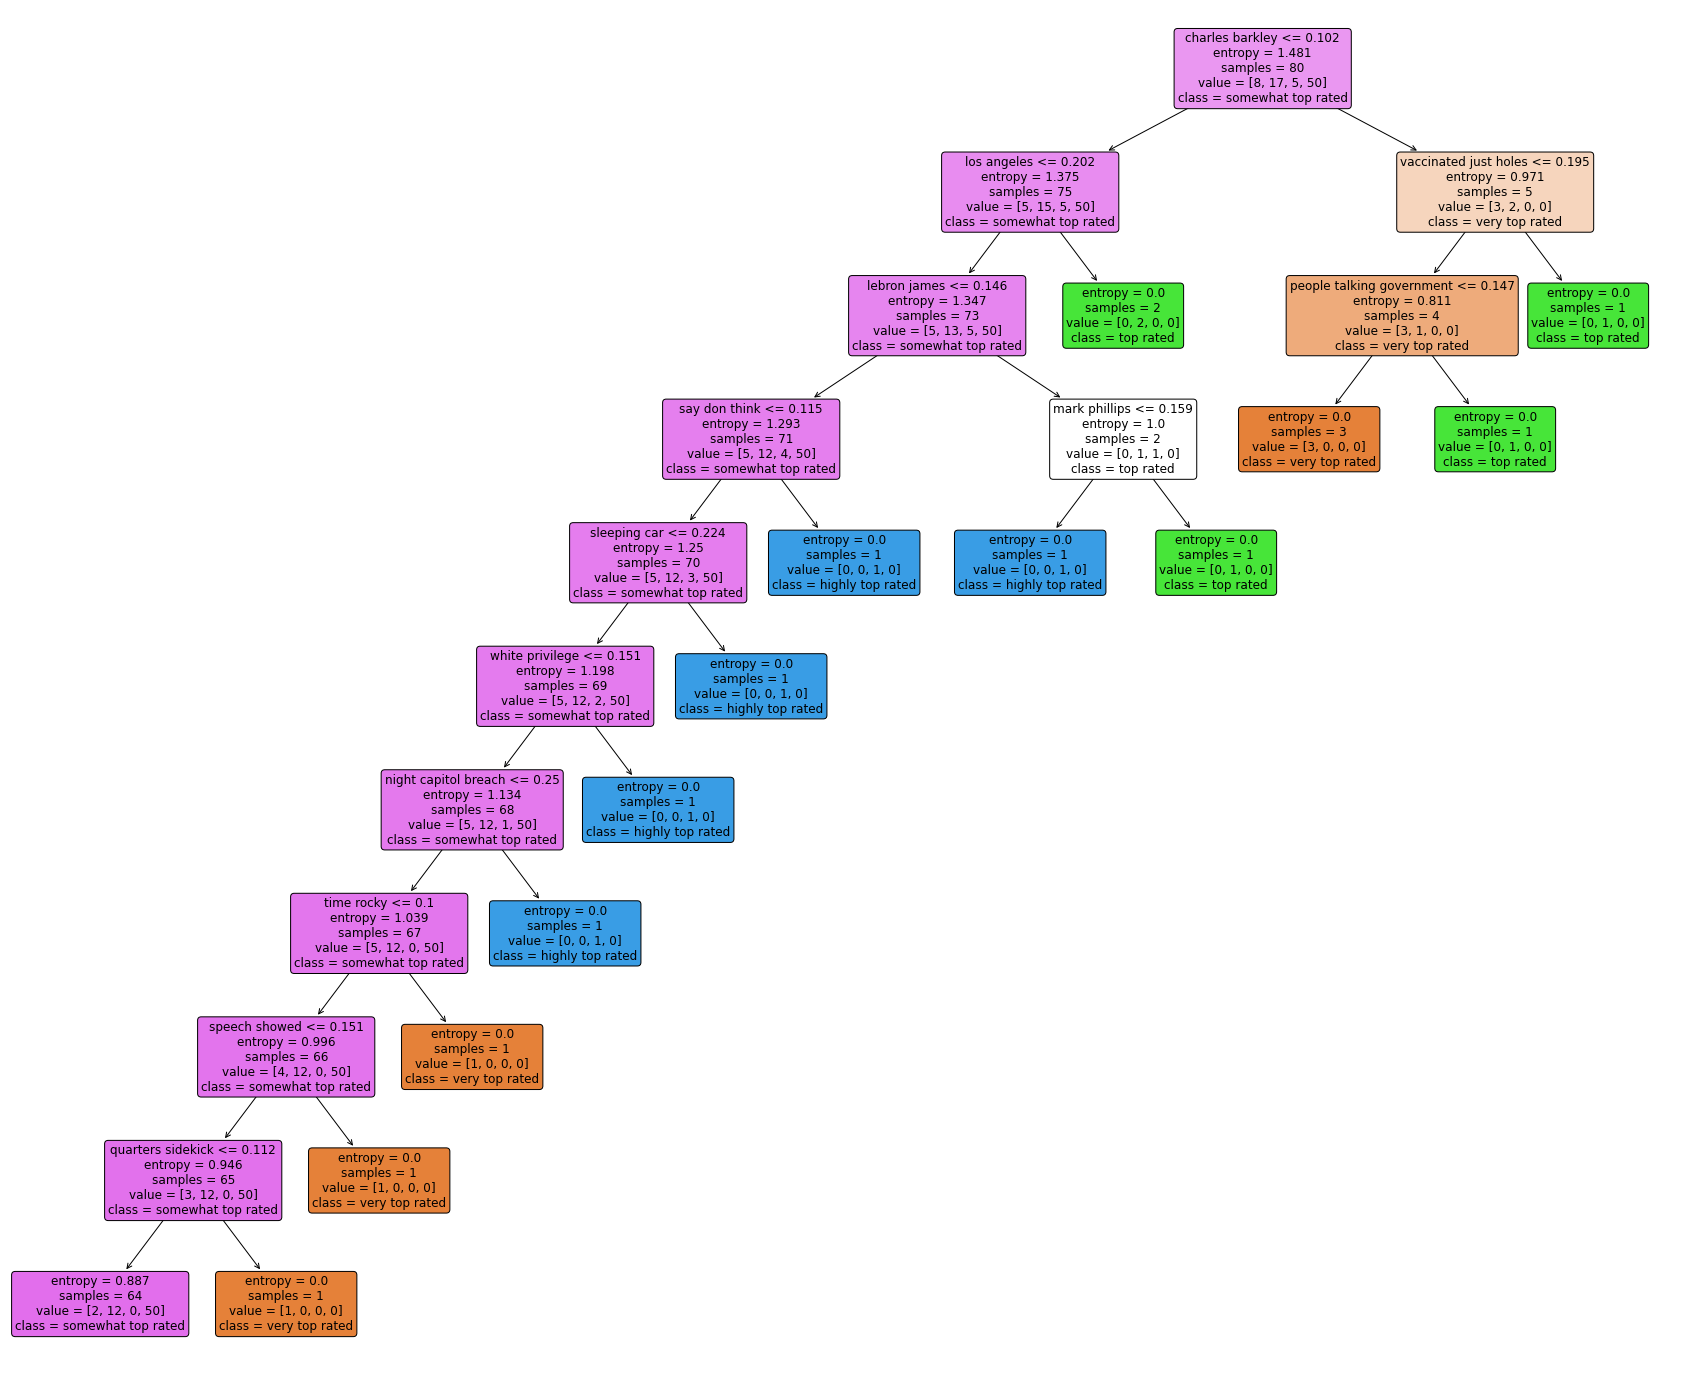

In [235]:
clf2= DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=1, criterion='entropy', splitter='best')
tree2 = clf2.fit(X_train, y_train)

fig = plt.figure(figsize=(30, 25))
_ = tree.plot_tree(clf2, impurity=True, rounded=True,
    feature_names = X_train.columns, class_names = y_train.unique(), filled=True, fontsize=12)
fig.savefig('tree2.png')

In [236]:
y_test_predict_proba = clf2.predict_proba(X_test)
y_test_predict = clf2.predict(X_test)

confusion_matrix(y_test, y_test_predict, labels=['highly top rated', 'very top rated', 'somewhat top rated', 'top rated'])


array([[ 0,  2,  0,  0],
       [ 1, 12,  0,  0],
       [ 0,  4,  0,  0],
       [ 0,  1,  0,  0]])

<Figure size 1080x720 with 0 Axes>

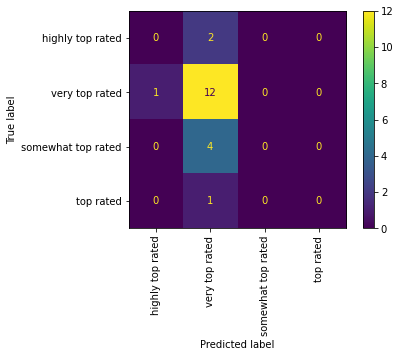

In [237]:
plt.figure(figsize=(15, 10))
plot_confusion_matrix(clf2, X_test, y_test, labels=['highly top rated', 'very top rated', 'somewhat top rated', 'top rated'])
plt.xticks(rotation ='vertical')
fig.savefig('tree2_cm.png')

## Unigram is bad

In [238]:
vec_tfidf2 = TfidfVectorizer(input='title', stop_words=my_stop_words, ngram_range=(2, 3), max_features=1000)
dtm2 = vec_tfidf2.fit_transform(reddit['title'])
col_names2 = vec_tfidf2.get_feature_names()
df2 = pd.DataFrame(dtm2.toarray(), columns=col_names2)
df2['upvote'] = reddit['upvote_ratio']

X_complete, y_complete = df2.loc[:, df2.columns != 'upvote'], df2['upvote']

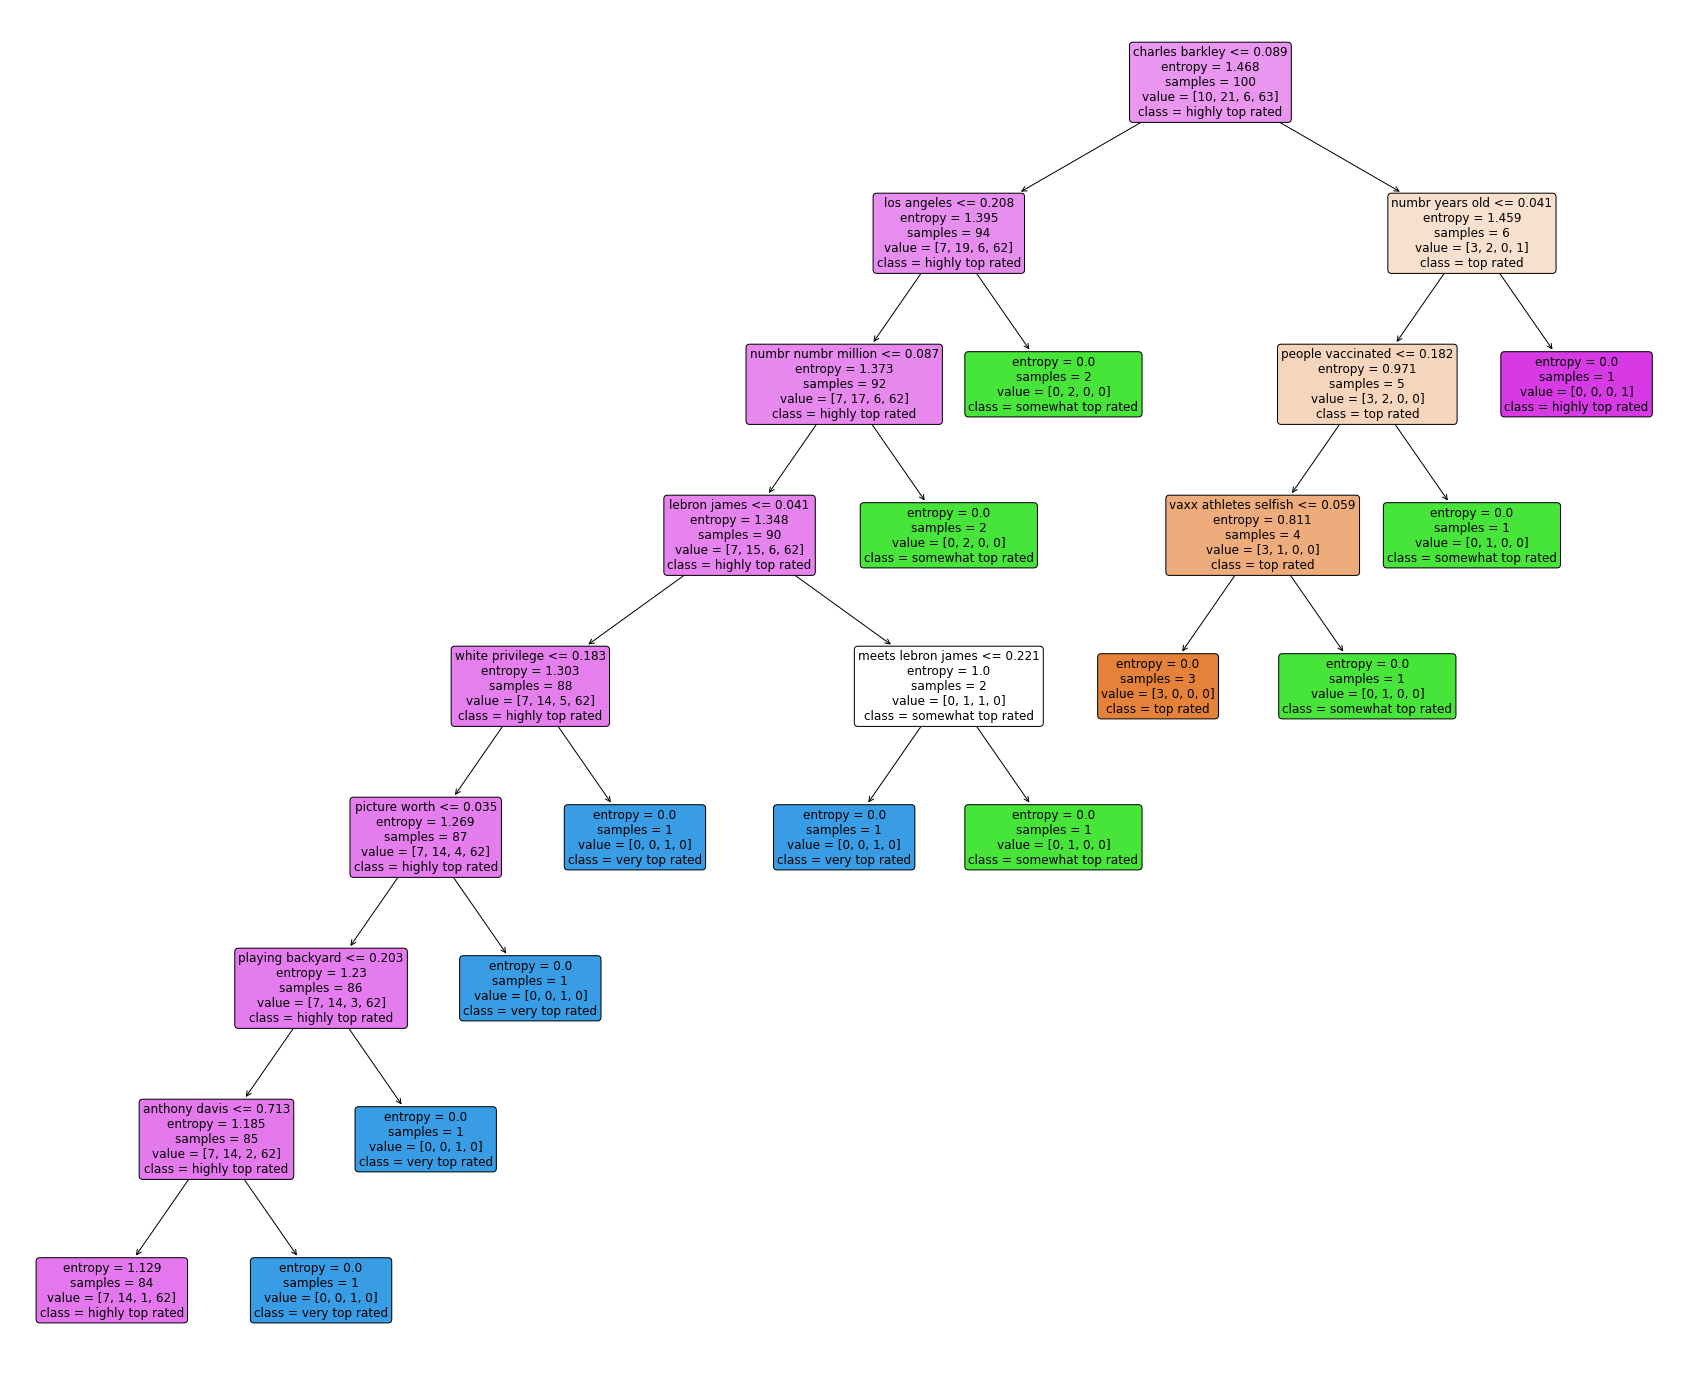

In [239]:
clf3= DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=1, criterion='entropy', splitter='random')
tree3 = clf3.fit(X_complete, y_complete)

fig = plt.figure(figsize=(30, 25))
_ = tree.plot_tree(clf3, impurity=True, rounded=True,
    feature_names = X_complete.columns, class_names = y_complete.unique(), filled=True, fontsize=12)
fig.savefig('tree3.png')


In [240]:
y_complete_predict_proba = clf3.predict_proba(X_complete)
y_complete_predict = clf3.predict(X_complete)

confusion_matrix(y_complete, y_complete_predict, labels=['highly top rated', 'very top rated', 'somewhat top rated', 'top rated'])

array([[ 3,  7,  0,  0],
       [ 0, 63,  0,  0],
       [ 0, 14,  7,  0],
       [ 0,  1,  0,  5]])

<Figure size 1080x720 with 0 Axes>

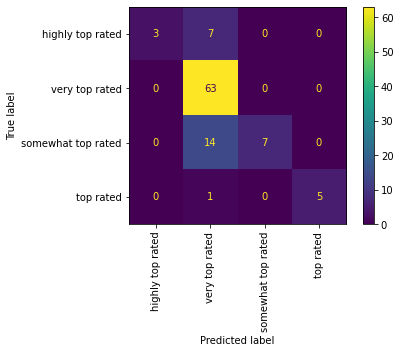

In [241]:
plt.figure(figsize=(15, 10))
plot_confusion_matrix(clf3, X_complete, y_complete, labels=['highly top rated', 'very top rated', 'somewhat top rated', 'top rated'])
plt.xticks(rotation ='vertical')
fig.savefig('tree3_cm.png')